# COMP49002 A2 Reddit classfication


In [14]:
#Setting up the variables for notebook
from google.colab import drive
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
drive.mount('/content/drive')
REDDIT_TRAIN_DATA="/drive/My Drive/Colab Notebooks/DataSet/hw2-reddit-classification/train.csv"
REDDIT_TEST_DATA="/drive/My Drive/Colab Notebooks/DataSet/hw2-reddit-classification/test.csv"


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Splitting the data and Feature Extraction


In [15]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.corpus import stopwords 
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk import SnowballStemmer
import string
import pandas as pd
import os 
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
class DataParser:
	def __init__(self):
		pass
		
	def import_reddit_dataset_train(self,path = '/hw2-reddit-classification/train.csv'):
		dataFrame=self.import_data_by_name(path)
		dataFrame = self.baseCleanData(dataFrame)
		return dataFrame
	def baseCleanData(self,data):
		dataFrame = data
		dataFrame["body"] = dataFrame["body"].apply(baseCleaner)
		return dataFrame

	
	def split_into_featuresMatrix_label(self,dataFrame):
		dataX = self.baseCleanData(dataFrame)
		dataX= dataX[dataX.columns[:-1]]
		dataX = dataX['body']
		dataX = dataX.to_numpy()
		y= dataFrame["subreddit"].to_numpy()
		return dataX , y
	
	def import_reddit_dataset_test(self,path = '/hw2-reddit-classification/test.csv'):
		return self.import_data_by_name(path)

	def import_data_by_name(self,dataPath):
		return pd.read_csv(os.getcwd()+dataPath)
	
	def featuresTfidNormalizedVector(self,trainData,testData):
		vectorizer = TfidfVectorizer(max_features=5000)
		vectors_train = vectorizer.fit_transform(trainData)
		X_train = vectors_train.toarray()
		vectorizer_test = vectorizer.transform(testData)
		X_test =vectorizer_test.toarray()  
	
		return X_train , X_test
		
	def featuresCountBinaryVector(self,trainData,testData):
		vectorizer = CountVectorizer(max_features=5000,binary=True)
		X_train = vectorizer.fit_transform(trainData).toarray()
		X_test = vectorizer.transform(testData).toarray()
		return X_train , X_test

#helper functions 
def stemmize(sentence):
  stemmer = SnowballStemmer("english")
  stemmize_tokens=[stemmer.stem(token) for token in word_tokenize(sentence)]
  return " ".join(stemmize_tokens)
  
def baseCleaner(sentence):
  func_cleaners=[removeStopwords,remove_punctuation,stemmize]
  sentence=sentence
  for clean_func in func_cleaners:
    sentence=clean_func(sentence)
  return sentence

def remove_punctuation(sentence):
  return sentence.translate(str.maketrans('', '', string.punctuation))

def removeStopwords(sentence):
  stop_words = set(stopwords.words('english')) 
  filtered_sentence = [w for w in word_tokenize(sentence)  if not w in stop_words] 
  return " ".join(filtered_sentence)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
#load up necessary data 
import pandas as pd 
import numpy as np 
import os 

#loading up the data to panadas
parser = DataParser()
train_pd=parser.import_reddit_dataset_train(REDDIT_TRAIN_DATA)
test_pd=parser.import_reddit_dataset_test(REDDIT_TEST_DATA)
trainData, labels = parser.split_into_featuresMatrix_label(train_pd)
testData = parser.baseCleanData(test_pd)["body"].to_numpy()

# Investigating REDDIT data

In [17]:
train_pd

,body,subreddit
0,titl say look recommend random tabl dip case t...,rpg
1,poor plan yeah tie togeth neat dungeon cool ca...,rpg
2,actual run two dream campaign one nearfutur tl...,rpg
3,general note levelclass system basic rpgs skil...,rpg
4,post review blog newli relea sciencefantasi zi...,rpg
...,...,...
11577,recent issu keyboard key repeat realli high ho...,computers
11578,https wwwebaycomschihtml fsrp1 nkwdellinspiron...,computers
11579,malwar download run scan adwclean https wwwmal...,computers
11580,want upgrad pc nt realli much money good proce...,computers


In [18]:

#printing out the name of colmns and couple of rows
train_pd.head()

,body,subreddit
0,titl say look recommend random tabl dip case t...,rpg
1,poor plan yeah tie togeth neat dungeon cool ca...,rpg
2,actual run two dream campaign one nearfutur tl...,rpg
3,general note levelclass system basic rpgs skil...,rpg
4,post review blog newli relea sciencefantasi zi...,rpg


In [19]:
#decribe data
train_pd.describe()

,body,subreddit
count,11582,11582
unique,11375,8
top,hello ever find need anim relat help resourc s...,datascience
freq,87,2382


In [20]:
#show the classes
print(train_pd["subreddit"].unique())

['rpg' 'anime' 'datascience' 'hardware' 'cars' 'gamernews' 'gamedev'
 'computers']


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


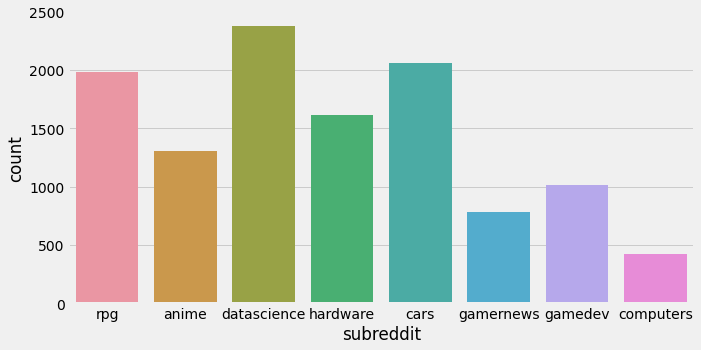

In [21]:
#Show the distrubiton of classes
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.countplot(train_pd["subreddit"])

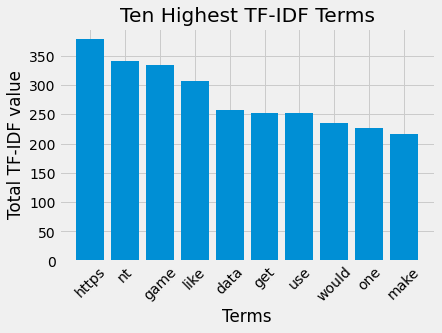

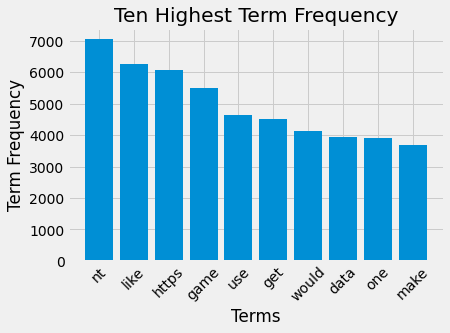

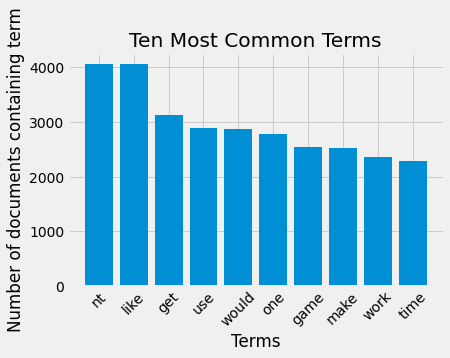

In [22]:
#showing the top 10 words after removing the stop words and punctionations
def show_top_n_words_tf(trainData, n=10):
  #create a tfid vector with the data 
  vectorizer = TfidfVectorizer(max_features=5000)
  #create the words 
  words = vectorizer.fit_transform(trainData)
  #sum each colmns 
  sum_words = words.sum(axis=0) 
  #create a tupe of top words 
  term_freq = [(word, sum_words[0, index]) for word, index in  vectorizer.vocabulary_.items()]
  #sort the tope words
  term_freq =sorted(term_freq, key = lambda x: x[1], reverse=True)
  #get top n words 
  top_n_words=term_freq[:n]
  dict_n_words = createDictionaryOfTopWords(top_n_words)
  displayHistogramwords(dict_n_words,"Total TF-IDF value","Ten Highest TF-IDF Terms")
  

#showing the top 10 words after removing the stop words and punctionations
def show_top_n_words_cv(trainData, n=10):
  #count vectorizer
  vectorizer = CountVectorizer(max_features=5000,)
  #create the words 
  words = vectorizer.fit_transform(trainData)
  #sum each colmns 
  sum_words = words.sum(axis=0) 
  #create a tupe of top words 
  term_freq = [(word, sum_words[0, index]) for word, index in  vectorizer.vocabulary_.items()]
  #sort the tope words
  term_freq =sorted(term_freq, key = lambda x: x[1], reverse=True)
  #get top n words 
  top_n_words=term_freq[:n]
  dict_n_words = createDictionaryOfTopWords(top_n_words)
  displayHistogramwords(dict_n_words,"Term Frequency","Ten Highest Term Frequency")


def show_top_n_words_binary_cv(trainData, n=10):
  #count vectorizer
  vectorizer = CountVectorizer(max_features=5000,binary=True)
  #create the words 
  words = vectorizer.fit_transform(trainData)
  #sum each colmns 
  sum_words = words.sum(axis=0) 
  #create a tupe of top words 
  term_freq = [(word, sum_words[0, index]) for word, index in  vectorizer.vocabulary_.items()]
  #sort the tope words
  term_freq =sorted(term_freq, key = lambda x: x[1], reverse=True)
  #get top n words 
  top_n_words=term_freq[:n]
  dict_n_words = createDictionaryOfTopWords(top_n_words)
  displayHistogramwords(dict_n_words, "Number of documents containing term","Ten Most Common Terms")


def displayHistogramwords(common_words_dict,ylabel="values",title= "Top Ten Terms"):

  fig, ax = plt.subplots()
  plt.xlabel ('Terms')
  plt.ylabel (ylabel)
  plt.title(title)
 
  plt.bar(range(len(common_words_dict)), common_words_dict.values(),align='center')
  plt.xticks(range(len(common_words_dict)), common_words_dict.keys())
  plt.xticks(rotation=45)
  plt.savefig(title+'.png',bbox_inches='tight')
  plt.show()

def createDictionaryOfTopWords(wordlist):
  words_dict={}
  for word in wordlist:
    words_dict[word[0]]=word[1]
  return words_dict


show_top_n_words_tf(train_pd['body'], 10)
show_top_n_words_cv(train_pd['body'], 10)
show_top_n_words_binary_cv(train_pd['body'], 10)





# Graphing functions

In [23]:
#this will provide stats for the two dataset
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import numpy as np 


def get_histogram_Of_ClassLabels(train_pd,dataSetName):
    plt.figure(figsize=(10,5))
    sns.countplot(train_pd["subreddit"])
    #Added labels
    plt.title('Histogram of Class Labels for Reddict Text Classfication')
    plt.xlabel('Class Labels')
    plt.ylabel('Count')
    plt.savefig('Histogram_'+dataSetName+'.png',bbox_inches='tight')
    plt.show()

#used for Results
def graphAccuracy(group_names,group_data,dataSetName):
  
    #make graph for plot one 
    plt.figure(1)
    fig, ax = plt.subplots()
    plt.style.use('fivethirtyeight')
    ax.set(xlim=[0.5, 1], ylabel='Classfier Name', xlabel='Average Accuracy',title='Classifiers Accuracy on Reddit Data')
    graphResults(group_names,group_data,ax)
    plt.savefig('Accuracy_'+dataSetName+'.png',bbox_inches='tight')
    plt.show()
def graphResults(group_names,group_data,ax):

    barSize=2
    seperationSize=7
    print(group_names)
    #log Results
    logRegResults=group_data[2:4]
    logRegLabels = group_names[2:4]
    logRegXPos = np.arange(len(logRegResults)*barSize, step=barSize)

    print(logRegResults)
    
    #DEcision Tree results
    descionTreeResults=group_data[0:2]
    descionTreeLabels=group_names[0:2]
    descionTreeXpos = np.arange(len(descionTreeResults)*barSize,step=barSize) +    seperationSize
    
    #Bernouli results
    bnbResults = group_data[4:]
    bnbLabel = group_names[4:]
    bnbxPos = np.arange(len(bnbResults)) +    seperationSize*2


    for i in range(len(logRegXPos)):
      color_bar=assignFeatureColor(logRegLabels[i])
      bar = ax.barh(logRegXPos[i], logRegResults[i],barSize,  color=color_bar)
    for i in range(len(descionTreeLabels)):
      color_bar=assignFeatureColor(descionTreeLabels[i])
      bar = ax.barh(descionTreeXpos[i], descionTreeResults[i],barSize, color=color_bar)

    for i in range(len(bnbResults)):
      color_bar=assignFeatureColor(bnbLabel[i])
      bar = ax.barh(bnbxPos[i], bnbResults[i],barSize, color=color_bar)

    ax.set_yticks([logRegXPos[1],descionTreeXpos[1],bnbxPos[0]])
    ax.set_yticklabels(["Logistic Regression","Decison Tree","Bernoulli Naïve Bayes"])
    binary_label = mpatches.Patch(color='red', label='Bags of Words')
    tfIdf_label = mpatches.Patch(color='blue', label='TF-IDF')
    plt.legend(handles=[binary_label,tfIdf_label],title="Feature Vectorizer used",bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


def graphRunTime(group_names,group_data,dataSetName):
    #make graph for plot 2
    plt.figure(1)
    fig, ax = plt.subplots()
    plt.style.use('fivethirtyeight')
    ax.set(xlim=[0,50], ylabel='Classfier Name-feature', xlabel='Average Runtime',title='Classifiers RunTime on Reddit Data')
    graphResults(group_names,group_data,ax)
    plt.savefig('RunTime_'+dataSetName+'.png',bbox_inches='tight')
    plt.show()


def assignClassiferLabel(classiferName):
  labels = ["Decision Tree", "Logistic Regression","Bernoulli Naïve Bayes"]
  for label in labels:
    if (classiferName.find(label)>0):
      return str(label)

def assignFeatureColor(classiferName):
  if (classiferName.find("BinaryCNT")>0):
    return "red"
  elif (classiferName.find("TFIDF")>0):
    return "blue"




# Implementation of Bernoulli Naive Bayes 

In [24]:
import numpy as np

class BernoulliNaiveBayes():
    def __init__(self):
        self.isLaplace_smoothing = True

    
    def compute_class_prob(self,labels):
        #takes in the training set labels which is an numpy array

        #get the aavialable class labels options 
        self.class_names= np.unique(labels)

        #array to hold the class probabilties 

        class_probs ={}
        for class_k_name in self.class_names:
            #get all the rows that have the same value as class_k_name  and divide by the number of examples
            class_k_prob=(float(labels[labels==class_k_name].shape[0]))/(float(labels.shape[0]))

            #insert the probability of class k into the dictionary 
            class_probs[class_k_name]=np.log(class_k_prob)

        #save the list to the class
        self.class_prob = class_probs
   
    
    def compute_feature_prob(self,X_train,y_train):

        features_count=np.zeros((self.class_names.shape[0],X_train.shape[1]))
        features_prob=np.zeros((self.class_names.shape[0],X_train.shape[1]))
        for name in range(self.class_names.shape[0]):
            #create a vector of counts 
            examples_of_class_k = X_train[(self.class_names[name]==y_train)]
            num_class_k = examples_of_class_k.shape[0]
            feature_count_class_k = examples_of_class_k.sum(axis=0)
            features_count[name,:] = feature_count_class_k

            if self.isLaplace_smoothing:
                feature_count_class_k = feature_count_class_k+1
                num_class_k+=2
                features_prob[name,:]= feature_count_class_k / float(num_class_k)
            
               

        self.feature_count_=features_count
        self.features_prob= features_prob
        return features_count

        

    def fit(self,X,y):
        #X will be a sparse matrix of 5000 words where each row is an example anf colmns repreosnt a word of 5000 colmns 
        # each entry  is 1 or 0 representing if the word is present in the example 
        X = np.array(X)
        y= np.array(y)

        #estimate the class probabilties
        self.compute_class_prob(y)
        #estimate the feature  probabilties accoding to the class names
        self.compute_feature_prob(X,y)
    

    def predict(self,X):
      # return predictions corresponding to the data X
      predicts=[self.predict_sample(i) for i in X]
      return np.array(predicts)

 
    def predict_sample(self,testPoint):
        #uses the log likelihood to predict samples of data

        #contins the lists of all the probabilties that are likely 
        class_probs=[]

        #do for all classes available
        for class_k_name in range(len(self.class_names)):
          feature_likehood=0
          #compute the likelihood of the features
          feat_prob=np.log(self.features_prob[class_k_name])
          x_i_j =testPoint*feat_prob

          not_feat_prob=np.log(1-self.features_prob[class_k_name]) 
          not_x_i_j= (1-testPoint) * not_feat_prob
          
          feature_likehood+=x_i_j.sum()+not_x_i_j.sum()
        
          #add the class proabbailties to the total 
          class_prob=feature_likehood + self.class_prob[self.class_names[class_k_name]]
          class_probs.append(class_prob)
        
        #returns the the class label with the highest probabilties 
        return self.class_names[np.argmax(class_probs)]

#Cross Validation

In [25]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import time


def runKFoldFeatures(X,y,model,featureExtracter):

    model_accuracies = []
    runTime =[]

    # Create instance of KFold and give it number of split, and to shuffle before splitting
    kf = KFold(n_splits = 10, random_state=1, shuffle=True)

    # for each fold
    for train_index, test_index in kf.split(X):
        X_train=X[train_index]
        X_test=X[test_index]
        X_train, X_test= featureExtracter(X_train,X_test)
    
        # start the timer 
        start = time.time()

        # fitting the model
        model.fit(X_train, y[train_index])

        # getting predictions from the model
        predicted_set = model.predict(X_test)

        # stop the timer
        end = time.time()

        # get the accuracy of the model in this fold
        accuracy = accuracy_score(y[test_index], predicted_set)

        # save the accuracy and runtime
        model_accuracies.append(accuracy)
        runTime.append(end - start)
        

    avg_acc=np.array(model_accuracies).mean()
    avg_runTime = np.array(runTime).mean()
    print("Avg Accuracy  "+str(avg_acc))
    print("Avg Runtime "+ str(avg_runTime))
    return avg_acc, avg_runTime
    



#Results 

Starting Reddit Test
Avg Accuracy  0.699703380169612
Avg Runtime 18.320113110542298
Avg Accuracy  0.6999650553377413
Avg Runtime 17.42846534252167
Avg Accuracy  0.8823171812994646
Avg Runtime 33.61620838642121
Avg Accuracy  0.8663440432389903
Avg Runtime 30.163298964500427
Avg Accuracy  0.8254195967281663
Avg Runtime 2.4328598260879515
['Decision Tree-TFIDF', 'Decision Tree-BinaryCNT', 'Logistic Regression-TFIDF', 'Logistic Regression-BinaryCNT', 'Bernoulli Naïve Bayes-BinaryCNT']
[0.8823171812994646, 0.8663440432389903]


<Figure size 432x288 with 0 Axes>

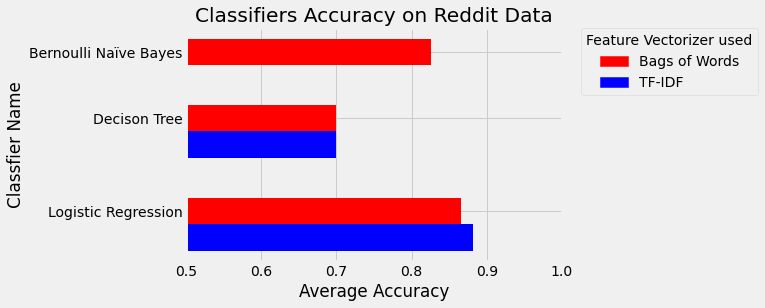

['Decision Tree-TFIDF', 'Decision Tree-BinaryCNT', 'Logistic Regression-TFIDF', 'Logistic Regression-BinaryCNT', 'Bernoulli Naïve Bayes-BinaryCNT']
[33.61620838642121, 30.163298964500427]


<Figure size 432x288 with 0 Axes>

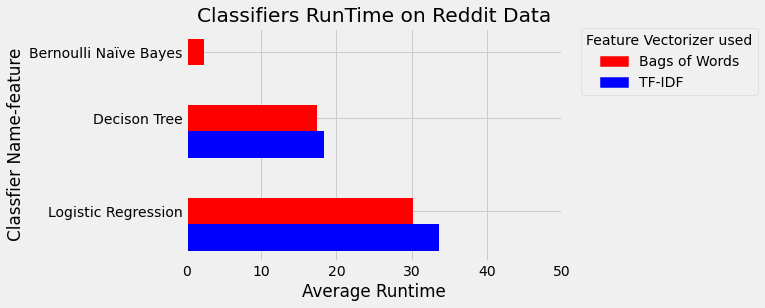

Runtime of test:
Decision Tree-TFIDF : 18.320113110542298
Decision Tree-BinaryCNT : 17.42846534252167
Logistic Regression-TFIDF : 33.61620838642121
Logistic Regression-BinaryCNT : 30.163298964500427
Bernoulli Naïve Bayes-BinaryCNT : 2.4328598260879515

Accuracy of test:
Decision Tree-TFIDF : 0.699703380169612
Decision Tree-BinaryCNT : 0.6999650553377413
Logistic Regression-TFIDF : 0.8823171812994646
Logistic Regression-BinaryCNT : 0.8663440432389903
Bernoulli Naïve Bayes-BinaryCNT : 0.8254195967281663


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

def runTest():
    print("Starting Reddit Test")
    parser = DataParser()
    dataSetName = "Reddit Text Dataset"

    #getting data from local variables 
    X_data = trainData
    y= labels

    runTimeData = {}
    accuracyData= {}


    names = ["Decision Tree-TFIDF","Decision Tree-BinaryCNT"]
    accuracyData[names[0]], runTimeData[names[0]] = runKFoldFeatures(X_data,y,DecisionTreeClassifier(),parser.featuresTfidNormalizedVector)
    accuracyData[names[1]], runTimeData[names[1]]=  runKFoldFeatures(X_data,y,DecisionTreeClassifier(),parser.featuresCountBinaryVector)
    names.append("Logistic Regression-TFIDF")
    accuracyData[names[2]], runTimeData[names[2]] = runKFoldFeatures(X_data,y,LogisticRegression(max_iter=1000, C=1),parser.featuresTfidNormalizedVector)
    names.append("Logistic Regression-BinaryCNT")
    accuracyData[names[3]], runTimeData[names[3]]= runKFoldFeatures(X_data,y,LogisticRegression(max_iter=1000, C=1),parser.featuresCountBinaryVector)
    names.append("Bernoulli Naïve Bayes-BinaryCNT")
    accuracyData[names[4]], runTimeData[names[4]]= runKFoldFeatures(X_data,y,BernoulliNaiveBayes(),parser.featuresCountBinaryVector)
    accuracy_data = list(accuracyData.values())
    runTime_data = list(runTimeData.values())
    group_names = list(accuracyData.keys()) 

    return group_names ,accuracy_data, runTime_data , dataSetName
if __name__ == "__main__":
  group_names, accuracy_data, runTime_data , dataSetName = runTest()
  graphAccuracy(group_names,accuracy_data,dataSetName)
  graphRunTime(group_names,runTime_data,dataSetName)
  print("Runtime of test:")
  for i in range(len(group_names)):
    print(group_names[i]+" : " +str(runTime_data[i]))
  print()
  print("Accuracy of test:") 
  for i in range(len(group_names)):
    print(group_names[i]+" : " +str(accuracy_data[i]))